# Problem 1 (2 points)

Recall that for the original GAN, the discriminator $f_\phi(x)$ is trained with the following optimization:

$$\max_\phi p(x) c [f_\phi(x)] + q_\theta(x) \log [1 - f_\phi(x)]$$

where $p(x)$ is the true data distribution, $q_\theta(x)$ is the generator's learned distribution, and $f_\phi(x) \in [0, 1]$.

1. Assuming $q_\theta(x)$ is fixed, what is the solution to this optimization problem? "Solution" here means the function $f_\phi(x)$ that maximizes the above objective. Your expression should be in terms of $p(x)$ and $q_\theta(x)$.
1. Assume that $q_\theta(x) = p(x)$, i.e. the generator has learned to fit the data distribution perfectly. What is the optimal discriminator in this case?

### 1.1)
Assuming that $q_\theta(x)$ is fixed:

We let:

\begin{align}
&f_\phi(x) = y, \\
&p(x) = a, \\
&q_\theta(x) = b
\end{align}

We find $\frac{d}{dy}$ of the following expression and make it equal to $0$, finding the value of $y$ that maximizes the expression:
\begin{align}
&\frac{d}{dy}[a \log(y) + b \log(1-y)] = 0 \\
& \frac{a}{y} - \frac{b}{1-y} = 0 \\
& \frac{a}{y} = \frac{b}{1-y} \\
&a-ay = by \\
&a = y(a+b) \\
& y = \frac{a}{a+b}
\end{align}

Substituting the original variables and constants back gives us the solution:

$$ f_\phi^*(x) = \frac{p(x)}{p(x) + q_\theta(x)}$$




### 1.2)

Given the solution in 1.1), we substitute $q_\theta(x) = p(x)$, yielding the following result:

$$ f_\phi^*(x) = \frac{p(x)}{p(x) + p(x)}$$
$$f_\phi^*(x) = \frac{1}{2}$$

# Problem 2 (1 point)

Recall that the forward process for the Diffusion model is defined as

$$q(x_t | x_{t - 1}) = \mathop{\mathcal{N}}\left(x_t; \sqrt{1 - \beta_t} x_{t - 1}, \beta_t I\right)$$

Let $\bar{a}_t = \prod_{s = 1}^t (1 - \beta_s)$. Show that

$$q(x_t | x_0) = \mathop{\mathcal{N}}\left(x_t; \sqrt{\bar{a}_t} x_0, (1 - \bar{a})_t I\right)$$

### 2)
We'll utilize the [reparameterization trick](https://theaisummer.com/latent-variable-models/#reparameterization-trick) of the normal distribution:

Let
\begin{align}
&\bar{a}_t = \prod_{s = 1}^t a_s,\\
&a_t=(1-\beta_t) \\
\end{align}

Given $\epsilon \sim \mathop{\mathcal{N}}\left(0, 1\right) $ we can rewrite $\mathop{\mathcal{N}}\left(\mu, \sigma^2 \right)$ as:

$$\mathop{\mathcal{N}}\left(\mu, \sigma^2 \right) = \mu + \sigma \cdot \epsilon $$

Applying the reparameterization and substituing $a_t$ gives us:


\begin{align}
q(x_t | x_{t - 1})  &= \mathop{\mathcal{N}}\left(x_t; \sqrt{1 - \beta_t} x_{t - 1}, \beta_t I\right) \\
&= \sqrt{1 - \beta_t} x_{t - 1} + \sqrt{\beta} \cdot \epsilon \\
&= \sqrt{a_t} x_{t - 1} + \sqrt{1 - a_t} \cdot \epsilon \\
&= \sqrt{a_t a_{t-1}} x_{t - 2} + \sqrt{1 - a_t a_{t-1}} \cdot \epsilon \\
&= \sqrt{a_t a_{t-1} a_{t-2}} x_{t - 3} + \sqrt{1 - a_t a_{t-1} a_{t-2}} \cdot \epsilon \\
&= \sqrt{a_t a_{t-1} \dots a_1 a_0} x_0 + \sqrt{1 - a_t a_{t-1} \dots a_1 a_0} \cdot \epsilon \\
&= \sqrt{\bar{a}_t} x_0 + \sqrt{1 - \bar{a}_t} \cdot \epsilon \\
\end{align}

Therefore:

$$q(x_t | x_0) = \mathop{\mathcal{N}}\left(x_t; \sqrt{\bar{a}_t} x_0, (1 - \bar{a}_t) I\right)$$

# Problem 3 (2 points)

Recall that, when training a VAE, we maximize the following objective:

$$\mathbb{E}_{z \sim q_\phi (z | x)} \log p_\theta(x | z) - \mathop{\text{KL}}(q_\phi(z | x) || p(z))$$

1. Show that this objective is equal to $\log p_\theta(x) - \mathop{\text{KL}}(q_\phi(z | x) || p(z | x))$ and explain why it is therefore less than or equal to $\log p_\theta(x)$.
1. Assume that $q(z)$ is a univariate Gaussian with mean $\mu = 0$ and standard deviation $\sigma \in \mathbb{R}$ and p(z) is a standard (zero-mean unit-variance) Gaussian. Derive a closed-form expression for $\mathop{\text{KL}}(q(z) || p(z))$ and plot it with respect to $\sigma$.

### 3.1)
We expand the original objective to get the alternative objective:
\begin{align}
&\mathbb{E}_{z \sim q_\phi (z | x)} \log p_\theta(x | z) - \mathop{\text{KL}}(q_\phi(z | x) || p(z)) \\
& = \mathbb{E}_{z \sim q_\phi (z | x)} \left[ \log p_\theta(x | z)\right] + \mathbb{E}_{z \sim q_\phi (z | x)}\left[ \log \frac{p(z)}{q_\phi(z|x)}\right] \\
& = \mathbb{E}_{z \sim q_\phi (z | x)} \left[ \log p_\theta(x | z)\frac{p_\theta(x)}{p_\theta(x)} + \log \frac{p(z)}{q_\phi(z|x)}\right] \\
& = \mathbb{E}_{z \sim q_\phi (z | x)} \left[ \log p_\theta(x) + \log \frac{p_\theta(x | z)p(z)}{p_\theta(x)}\frac{1}{q_\phi(z|x)}\right] \\
& = \mathbb{E}_{z \sim q_\phi (z | x)} \left[ \log p_\theta(x) + \log \frac{p_\theta(x ,z)}{p_\theta(x)}\frac{1}{q_\phi(z|x)}\right] \\
& = \mathbb{E}_{z \sim q_\phi (z | x)} \left[ \log p_\theta(x) + \log \frac{p(z|x)}{q_\phi(z|x)}\right] \\
& = \log p_\theta(x) - \mathop{\text{KL}}(q_\phi(z | x) || p(z | x))
\end{align}

Since:

$$\mathop{\text{KL}}(q_\phi(z | x) || p(z | x)) \geq 0$$

We have:

$$ \log p_\theta(x) - \mathop{\text{KL}}(q_\phi(z | x) || p(z | x)) \leq  \log p_\theta(x)$$


### 3.2)

We know that $q(z)$ is a univariate Gaussian with $\mu =0 $ and standard deviation $\sigma = 1$, and $p(z)$ is a zero-mean unit-variance standard Gaussian. Therefore, we can define both as:

 $$\mathcal{N}(z|\mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}}\exp \left\{ -\frac{1}{2\sigma^2}(z - \mu)^2 \right\} $$

 The KL divergence has therefiore the closed-form solution:
\begin{align}
  \mathop{\text{KL}}(q(z) || p(z)) & = \mathop{\text{KL}}\left(\mathcal{N}(z|0,\sigma^2) || \mathcal{N}(z|0,1)\right) \\
  & = \sum_{z \in \mathcal{Z}} \mathcal{N}(z|0,\sigma^2) \log \left(\frac{\mathcal{N}(z|0,\sigma^2)}{\mathcal{N}(z|0,1)} \right)
 \end{align}

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import rel_entr

def Gaussian(z,mean,std):
    p = (1/(2 * np.pi * std**2)**1/2) * np.exp((-1/(2 * std**2)) * (z - mean)**2)
    return p

def KL(p_z, q_z):
    kl = np.sum(p_z * (np.log(p_z ) - np.log(q_z )  ))
    return kl

If we plot the expression we can see that the KL-divergence reaches its minimum value when both pdf's are equal and $\sigma = 1$

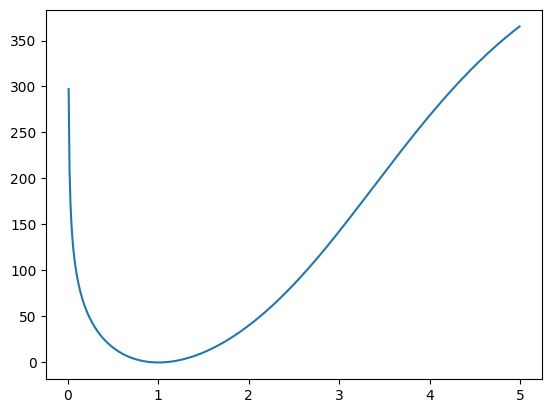

In [115]:
from scipy.special import rel_entr
z = np.arange(0, 10, 0.01)
sigma =np.arange(0.01, 5, 0.01)
KL_values = []
for s in sigma:
    #KL_values.append(KL(Gaussian(z, 0, s), Gaussian(z,0, 1)))
    KL_values.append(np.sum(rel_entr(norm.pdf(z, 0, s), norm.pdf(z, 0, 1))))
plt.plot(sigma, KL_values )
plt.show()